In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import acquire
import wrangle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Explore Exercises
1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In [2]:
#retrieve zillow data using acquire.py
df = acquire.get_zillow()

In [3]:
#take a look at the data
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,0,0.025595,...,None,NaN,6.059063e+13,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1,0.055619,...,None,NaN,6.111001e+13,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2,0.005383,...,None,NaN,6.059022e+13,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,3,-0.103410,...,None,NaN,6.037300e+13,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,4,0.006940,...,None,NaN,6.037124e+13,Central,None,None,Central,Condominium,None,None


In [4]:
#need to create dummy columns for fips

In [5]:
# create dummy columns for species
fips_dummies = pd.get_dummies(df.fips)

In [6]:
# add dummy columns to df
df = pd.concat([df, fips_dummies], axis=1)

In [7]:
#rename columns for fips to make more legible
df = df.rename(columns={"6037.0": "LA", "6059.0": "Orange", "6111.0": "Ventura"})

In [15]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,6037.0,6059.0,6111.0
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,0,0.025595,...,None,None,None,None,Single Family Residential,None,None,0,1,0
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1,0.055619,...,None,None,None,None,Single Family Residential,None,None,0,0,1
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2,0.005383,...,None,None,None,None,Single Family Residential,None,None,0,1,0
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,3,-0.103410,...,None,None,None,Central,Single Family Residential,None,None,1,0,0
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,4,0.006940,...,Central,None,None,Central,Condominium,None,None,1,0,0


In [8]:
#use summarize function from wrangle.py to look at data more
#summary = wrangle.summarize(df)

In [9]:
def zillow_split(df, target):
    '''
    This function take in get_zillow  from aquire.py and performs a train, validate, test split
    Returns train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test
    and prints out the shape of train, validate, test
    '''
    #create train_validate and test datasets
    train, test = train_test_split(df, train_size = 0.8, random_state = 123)
    #create train and validate datasets
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

    #Split into X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]

    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')
   
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test

In [10]:
#use zillow_split function from wrangle.py
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.zillow_split(df, 'logerror')

train -> (43444, 72)
validate -> (18620, 72)
test -> (15516, 72)


In [11]:
#set variable to correlation
zillow_correlation = train.corr()

In [12]:
#shows correlation to log error
logerror_corr = zillow_correlation['logerror'].sort_values(ascending=False)
logerror_corr

logerror                        1.000000
basementsqft                    0.456891
buildingclasstypeid             0.391056
yardbuildingsqft26              0.175675
poolsizesum                     0.048855
finishedsquarefeet12            0.043762
calculatedfinishedsquarefeet    0.039371
garagetotalsqft                 0.035306
bedroomcnt                      0.034465
garagecarcnt                    0.030147
calculatedbathnbr               0.029246
fullbathcnt                     0.027912
bathroomcnt                     0.026313
fireplacecnt                    0.024381
finishedsquarefeet6             0.019666
roomcnt                         0.017292
lotsizesquarefeet               0.013636
threequarterbathnbr             0.013482
6059.0                          0.012915
longitude                       0.011826
parcelid                        0.010303
finishedsquarefeet13            0.007681
structuretaxvaluedollarcnt      0.007351
censustractandblock             0.007056
fips            

In [13]:
train.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,6037.0,6059.0,6111.0
58165,NaN,NaN,261.0,7.0,NaN,NaN,NaN,12941943,58189,-0.019279,...,None,None,None,Floor/Wall,Single Family Residential,None,None,1,0,0
19986,NaN,NaN,266.0,NaN,NaN,NaN,NaN,14652266,19998,0.020416,...,None,None,None,None,Condominium,None,None,0,1,0
50575,NaN,NaN,261.0,NaN,NaN,NaN,13.0,14378389,50595,-0.157585,...,Yes,None,None,None,Single Family Residential,None,None,0,1,0
41184,NaN,NaN,261.0,2.0,NaN,NaN,1.0,11043779,41202,0.063701,...,Central,None,None,Central,Single Family Residential,None,None,1,0,0
10981,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14082257,10990,-0.011435,...,None,None,None,None,Single Family Residential,None,None,0,1,0


<hr style="border:2px solid black"> </hr>

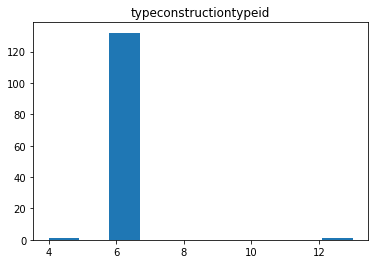

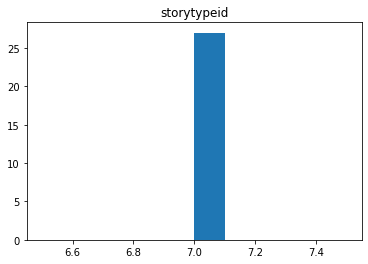

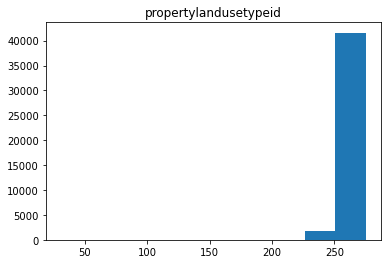

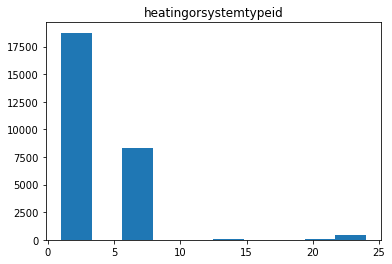

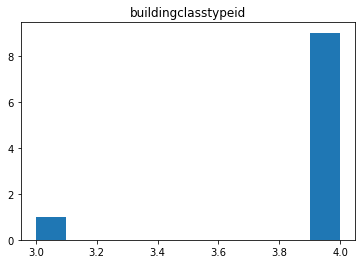

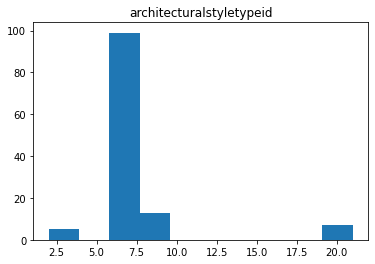

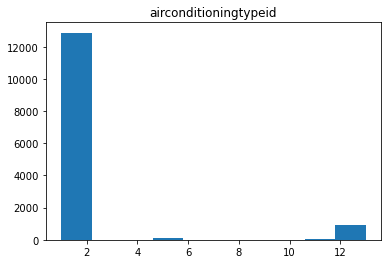

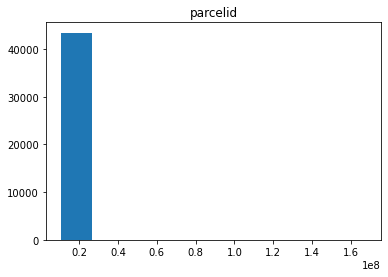

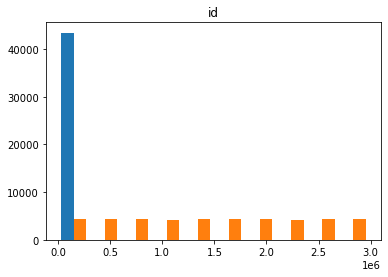

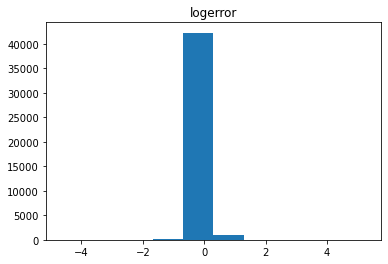

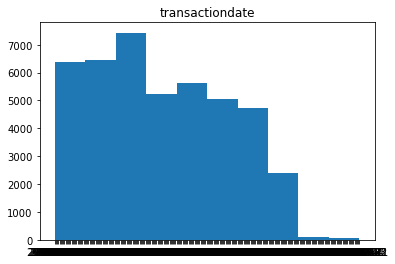

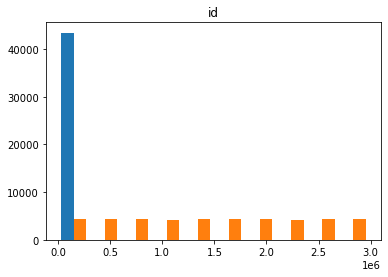

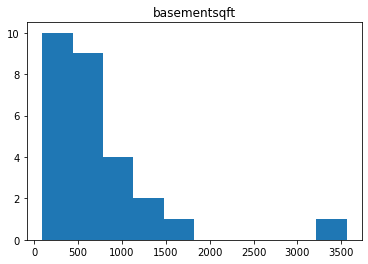

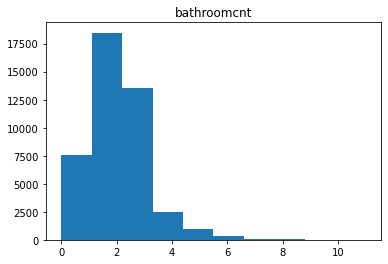

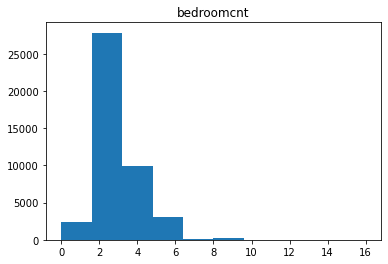

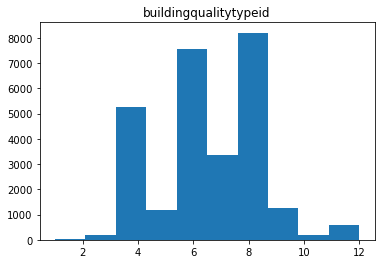

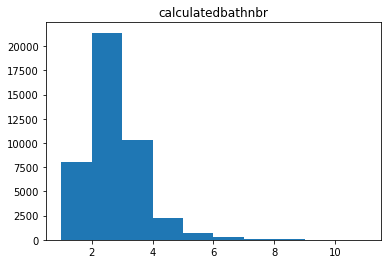

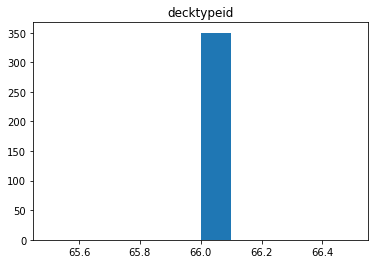

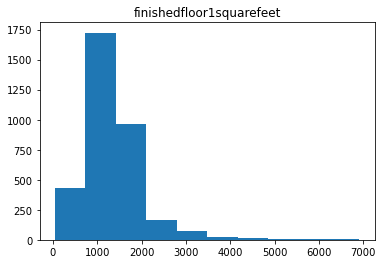

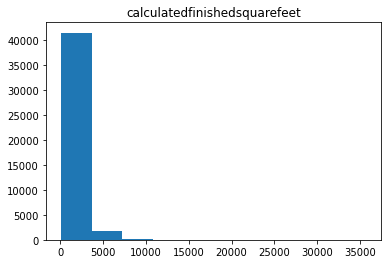

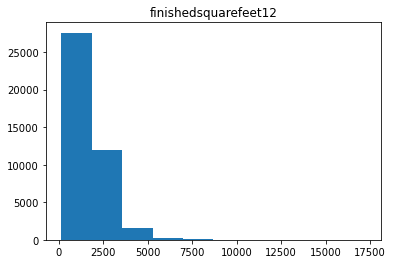

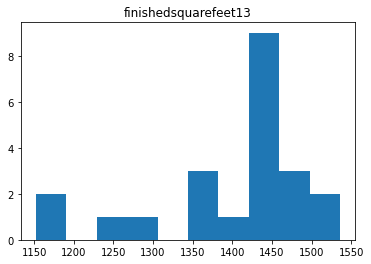

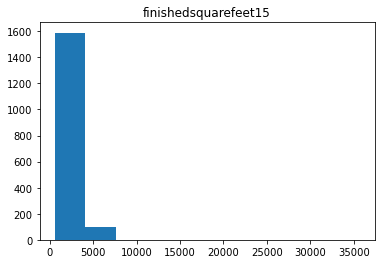

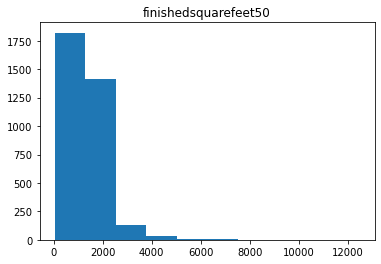

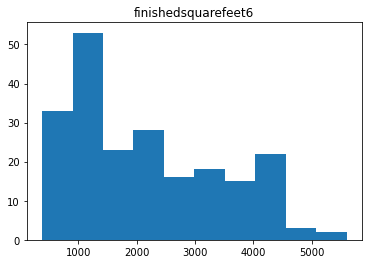

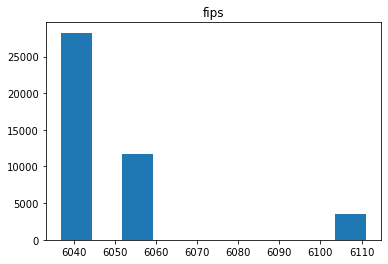

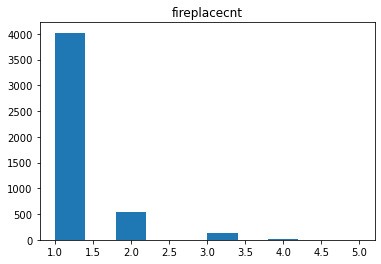

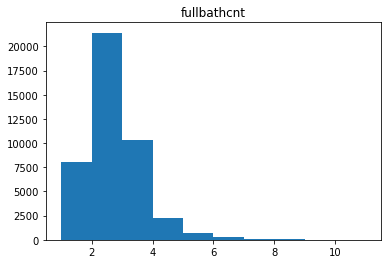

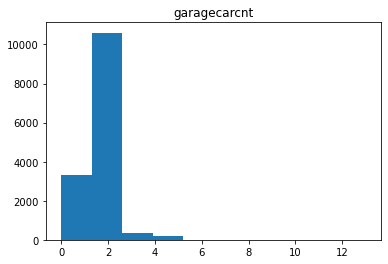

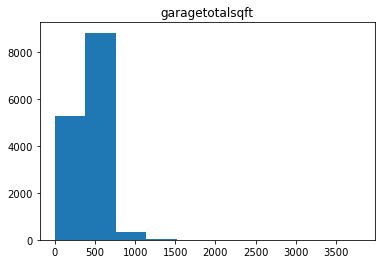

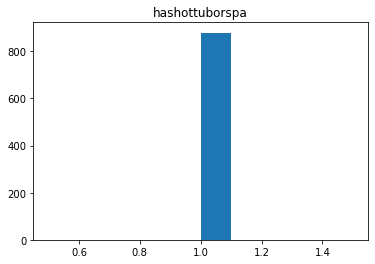

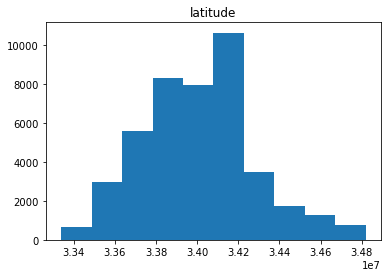

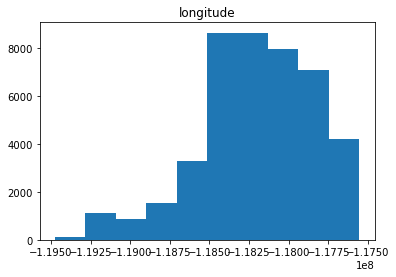

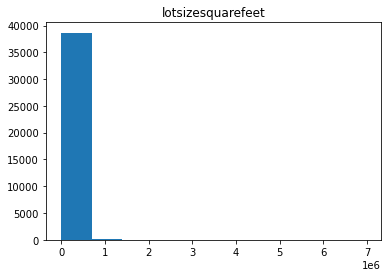

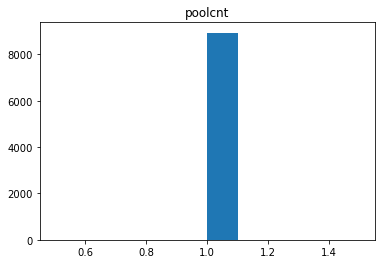

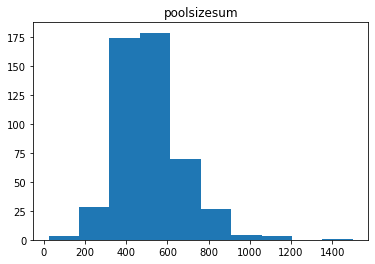

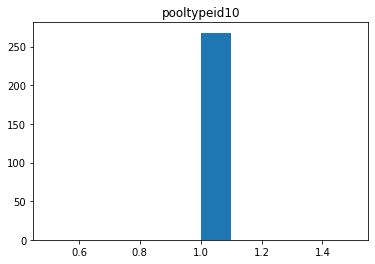

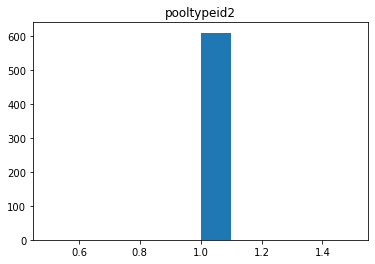

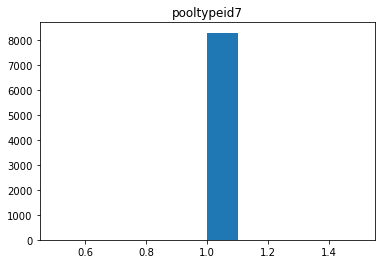

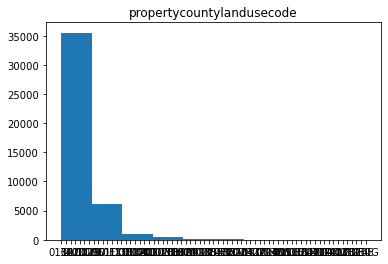

TypeError: 'value' must be an instance of str or bytes, not a NoneType

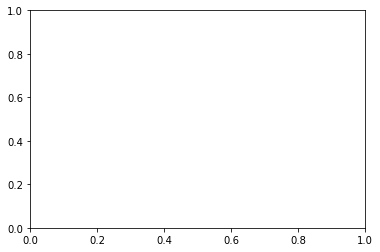

In [14]:
#take a look at the distributions to see if we should bin anything 
#or if there could be some visual relationships

#look at all columns distribution
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

<hr style="border:2px solid black"> </hr>

### #1 Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

##### Questions:
1. Is the logerror significantly different for properties in LA County vs Orange County vs Ventura County
2. Is the logerror significantly different for properties with basements vs those without
3. Is there a relationship between logerror and properties with a garage vs without?
4. Is there a relationship between logerror and properties with a pool vs without?
5. Is there a relationship between logerror and total sqft of the property?

<hr style="border:2px solid black"> </hr>

### #2 Answer those questions through a mix of statistical tests and visualizations.

#### Is the logerror significantly different for properties in LA County vs Orange County vs Ventura County

In [16]:
train.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,6037.0,6059.0,6111.0
58165,NaN,NaN,261.0,7.0,NaN,NaN,NaN,12941943,58189,-0.019279,...,None,None,None,Floor/Wall,Single Family Residential,None,None,1,0,0
19986,NaN,NaN,266.0,NaN,NaN,NaN,NaN,14652266,19998,0.020416,...,None,None,None,None,Condominium,None,None,0,1,0
50575,NaN,NaN,261.0,NaN,NaN,NaN,13.0,14378389,50595,-0.157585,...,Yes,None,None,None,Single Family Residential,None,None,0,1,0
41184,NaN,NaN,261.0,2.0,NaN,NaN,1.0,11043779,41202,0.063701,...,Central,None,None,Central,Single Family Residential,None,None,1,0,0
10981,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14082257,10990,-0.011435,...,None,None,None,None,Single Family Residential,None,None,0,1,0


In [17]:
sns.boxplot(train.logerror, train['6037.0'])
plt.title('Potential difference in logerror across counties?')
plt.show()

KeyError: '6037.0'

#### Is the logerror significantly different for properties with basements vs those without

In [ ]:
df.basement

#### Is there a relationship between logerror and properties with a garage vs without?

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(train.garagetotalsqft, train.logerror)

#### Is there a relationship between logerror and properties with a pool vs without?

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(train.poolcnt, train.logerror)
plt.show()

#### Is there a relationship between logerror and total sqft of the property?

In [ ]:
plt.scatter(x="calculatedfinishedsquarefeet", y="logerror", data=train)
plt.xlabel("Total Square Feet")
plt.ylabel("Log Error")
plt.title("Is there a relationship between total sqft and log error?")
plt.show()